### Plotting relative diatom AA results from THAA measurement using python for _T. weissflogii_ rot experiment

Starting with:

    Total acid hydrolyzable concentrations of the following amino acids:
    
        Histidine
        Arginine
        Serine
        Glycine
        Aspartic Acid
        Glutamic Acid
        Threonine
        Alanine
        Proline
        Lysine
        Tyrosine
        Methionine
        Valine
        Isoleucine
        Leucine
        Phenylalaine


Goal:

    Compare relative AA from this approach to peptides from peptidomics
    Make figure showing AA compositions of THAA and peptides over rot timepoints (Days 0,2,5,12)
    
Using:

    - pandas
    - matplotlib
    - numpy

In [1]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

## THAA compositions across degradation experiment
### THAA measurements from Q Exactive Plus run after derivatisation

In [2]:
# for each of the 4 rot timepoint samples:
# read in concentrations from individual files


T0 = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/thaa/T0-THAA-conc.csv")
T2 = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/thaa/T2-THAA-conc.csv")
T5 = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/thaa/T5-THAA-conc.csv")
T12 = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/thaa/T12-THAA-conc.csv")


frames = [T0, T2, T5, T12]
index = ['1. T0 dig.', '2. T2 dig.', '3. T5 dig.', '4. T12 dig.']

# concatenate dataframes
tot = pd.concat(frames, sort=False, ignore_index=True)

# there's a useless column in there
tot = tot.loc[:, ~tot.columns.str.contains('^Unnamed')]

# reindex with sample names
names = ['1. T0 THAA', '2. T2 THAA', '3. T5 THAA', '4. T12 THAA']
tot.insert(loc=0, column='sample', value=names)
tot.set_index('sample')

# separate out the dataframe into AAs and %PTMs, too
sum_AA = tot[['sample', 'A-conc', 'D-conc', 'E-conc', 'F-conc', 'G-conc', 'H-conc', 'I-conc', 'K-conc', \
              'L-conc', 'M-conc', 'P-conc', 'R-conc', 'S-conc', 'T-conc', 'V-conc', \
              'Y-conc']].copy()


sum_AA.head()

,sample,A-conc,D-conc,E-conc,F-conc,G-conc,H-conc,I-conc,K-conc,L-conc,M-conc,P-conc,R-conc,S-conc,T-conc,V-conc,Y-conc
0,1. T0 THAA,1.161,1.276,1.213,0.705,1.394,0.196,0.755,0.483,1.267,0.240,0.600,0.510,0.732,0.619,0.804,0.340
1,2. T2 THAA,0.982,0.964,0.961,0.601,1.143,0.154,0.654,0.461,0.976,0.064,0.472,0.386,0.574,0.482,0.642,0.247
2,3. T5 THAA,1.216,1.219,1.120,0.786,1.501,0.203,0.752,0.363,1.233,0.263,0.569,0.395,0.788,0.668,0.777,0.336
3,4. T12 THAA,1.718,1.767,1.504,0.971,1.943,0.250,0.999,0.532,1.619,0.353,0.733,0.522,0.920,0.873,1.081,0.432


In [3]:
# sum all the AAs in each dataset, making a new column

sum_AA['AA-Total-conc'] = sum_AA['A-conc'] + sum_AA['D-conc'] + sum_AA['E-conc'] \
+ sum_AA['F-conc'] + sum_AA['G-conc'] + sum_AA['H-conc'] + sum_AA['K-conc'] + sum_AA['I-conc'] + sum_AA['L-conc'] \
+ sum_AA['M-conc'] + sum_AA['P-conc'] + sum_AA['R-conc'] \
+ sum_AA['S-conc'] + sum_AA['T-conc'] + sum_AA['V-conc'] + sum_AA['Y-conc'] \

# calculate the relative (conc-normalized) AA composition (fractions of AA total for each dataset)

sum_AA['A_Relconc'] = sum_AA['A-conc']/sum_AA['AA-Total-conc']  #A
sum_AA['D_Relconc'] = sum_AA['D-conc']/sum_AA['AA-Total-conc']  #D
sum_AA['E_Relconc'] = sum_AA['E-conc']/sum_AA['AA-Total-conc']  #E
sum_AA['F_Relconc'] = sum_AA['F-conc']/sum_AA['AA-Total-conc']  #F
sum_AA['G_Relconc'] = sum_AA['G-conc']/sum_AA['AA-Total-conc']  #G
sum_AA['H_Relconc'] = sum_AA['H-conc']/sum_AA['AA-Total-conc']  #H
sum_AA['K_Relconc'] = sum_AA['K-conc']/sum_AA['AA-Total-conc']  #K
sum_AA['I/L_Relconc'] = (sum_AA['I-conc'] + sum_AA['L-conc'])/sum_AA['AA-Total-conc']  #I/L
sum_AA['M_Relconc'] = sum_AA['M-conc']/sum_AA['AA-Total-conc']  #M
sum_AA['P_Relconc'] = sum_AA['P-conc']/sum_AA['AA-Total-conc']  #P
sum_AA['R_Relconc'] = sum_AA['R-conc']/sum_AA['AA-Total-conc']  #R
sum_AA['S_Relconc'] = sum_AA['S-conc']/sum_AA['AA-Total-conc']  #S
sum_AA['T_Relconc'] = sum_AA['T-conc']/sum_AA['AA-Total-conc']  #T
sum_AA['V_Relconc'] = sum_AA['V-conc']/sum_AA['AA-Total-conc']  #V
sum_AA['Y_Relconc'] = sum_AA['Y-conc']/sum_AA['AA-Total-conc']  #Y

# make a smaller dataframe with just the relative, conc-normalized AA compositions
sum_relAA = sum_AA[['sample', 'A_Relconc', 'D_Relconc', 'E_Relconc', 'F_Relconc', 'G_Relconc', 'H_Relconc', \
                      'K_Relconc', 'I/L_Relconc', 'M_Relconc', 'P_Relconc', 'R_Relconc', \
                      'S_Relconc', 'T_Relconc', 'V_Relconc', 'Y_Relconc']].copy()

#export as a csv

sum_relAA.to_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/thaa/THAA_relAA.csv")

sum_relAA.head(6)

,sample,A_Relconc,D_Relconc,E_Relconc,F_Relconc,G_Relconc,H_Relconc,K_Relconc,I/L_Relconc,M_Relconc,P_Relconc,R_Relconc,S_Relconc,T_Relconc,V_Relconc,Y_Relconc
0,1. T0 THAA,0.094429,0.103782,0.098658,0.057340,0.113379,0.015941,0.039284,0.164457,0.019520,0.048800,0.041480,0.059536,0.050346,0.065392,0.027654
1,2. T2 THAA,0.100584,0.098740,0.098433,0.061559,0.117075,0.015774,0.047219,0.166957,0.006555,0.048346,0.039537,0.058793,0.049370,0.065758,0.025300
2,3. T5 THAA,0.099762,0.100008,0.091886,0.064484,0.123144,0.016654,0.029781,0.162852,0.021577,0.046681,0.032406,0.064648,0.054804,0.063746,0.027566
3,4. T12 THAA,0.105938,0.108960,0.092742,0.059875,0.119813,0.015416,0.032805,0.161436,0.021767,0.045199,0.032188,0.056731,0.053832,0.066658,0.026639


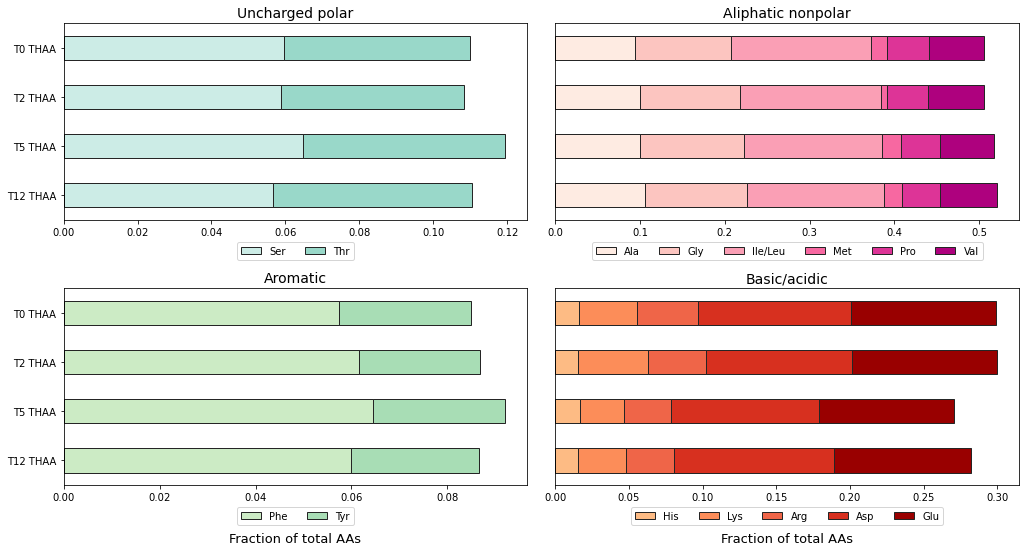

In [4]:
# plotting the AA compositions by residue type (charge, side group)
# order the horizontal bars by sample

sum_relAA_des = sum_relAA.sort_values('sample',ascending=False)

col_up = '#ccece6', '#99d8c9', '#66c2a4', '#2ca25f', '#006d2c'
col_na = '#feebe2', '#fcc5c0', '#fa9fb5', '#f768a1', '#dd3497', '#ae017e'
col_ar = '#ccebc5', '#a8ddb5', '#7bccc4', '#4eb3d3', '#2b8cbe', '#08589e'
col_ba = '#fdbb84', '#fc8d59', '#ef6548', '#d7301f', '#990000'

# divide up the dataframe into 4 smaller dataframes based on AA class

# uncharged polar: serine, threonine
up = sum_relAA_des[['sample', 'S_Relconc', 'T_Relconc']].copy()
up_names = ['sample', 'Ser', 'Thr']
up.columns = up_names

# nonpolar, aliphatic R-group: alanine, glycine, methionine, proline, valine
na = sum_relAA_des[['sample', 'A_Relconc', 'G_Relconc','I/L_Relconc', 'M_Relconc',\
                    'P_Relconc', 'V_Relconc']].copy()
na_names = ['sample', 'Ala', 'Gly', 'Ile/Leu', 'Met', 'Pro', 'Val']
na.columns = na_names

# aromatic R-group: phenylalanine, tyrosine
ar = sum_relAA_des[['sample', 'F_Relconc', 'Y_Relconc']].copy() 
ar_names = ['sample', 'Phe', 'Tyr']
ar.columns = ar_names

# basic and acidic R-group: hisdiine, lysine, arginine, aspartic acid, glutamic acid
ba = sum_relAA_des[['sample', 'H_Relconc', 'K_Relconc', 'R_Relconc', 'D_Relconc', 'E_Relconc']].copy()
ba_names = ['sample', 'His', 'Lys', 'Arg', 'Asp', 'Glu']
ba.columns = ba_names

# plot AA comps

fig, axes = plt.subplots(figsize=(14, 7),nrows=2, ncols=2)
plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace= 0.06, hspace= 0.35)

up.plot(ax=axes[0,0], x='sample', kind='barh', stacked=True, color = col_up, edgecolor = '#252525')
na.plot(ax=axes[0,1], x='sample', kind='barh', stacked=True, color = col_na, edgecolor = '#252525')
ar.plot(ax=axes[1,0], x='sample', kind='barh', stacked=True, color = col_ar, edgecolor = '#252525')
ba.plot(ax=axes[1,1], x='sample', kind='barh', stacked=True, color = col_ba, edgecolor = '#252525')

axes[0,0].set_title('Uncharged polar', fontsize = 14)
axes[0,0].set_ylabel("")
axes[0,0].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=5)
axes[0,0].set_yticklabels( ('T12 THAA', 'T5 THAA', 'T2 THAA', 'T0 THAA') )

axes[0,1].set_title('Aliphatic nonpolar', fontsize = 14)
axes[0,1].yaxis.set_ticks([])
axes[0,1].set_ylabel("")
axes[0,1].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=6)

axes[1,0].set_title('Aromatic', fontsize = 14)
axes[1,0].set_xlabel('Fraction of total AAs', labelpad = 30, fontsize = 13)
axes[1,0].set_ylabel("")
axes[1,0].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=3)
axes[1,0].set_yticklabels( ('T12 THAA', 'T5 THAA', 'T2 THAA', 'T0 THAA') )

axes[1,1].set_title('Basic/acidic', fontsize = 14)
axes[1,1].yaxis.set_ticks([])
axes[1,1].set_xlabel('Fraction of total AAs', labelpad = 30, fontsize = 13)
axes[1,1].set_ylabel("")
axes[1,1].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=5)


# save figure in ptm-analyses dir
plt.savefig("/home/millieginty/Documents/git-repos/rot-mayer/analyses/thaa/THAA-AAs.png", dpi = 300, bbox_inches='tight', transparent=True)

# also save in manuscript latex dir high res
#plt.savefig("/home/millieginty/Documents/git-repos/denovo-etnp/ETNP-AAs.png", dpi = 300, bbox_inches='tight')

## Comparison to peptide AA composition - TD

### Reading in the csv of digested peptide relative AAs as a dataframe, then compare to THAA relative AAs
### Just PeaksDB peptides, so only algal signal.

In [5]:
# Read in the peptide NAAF-corrected relative AAs of TRYPSIN DIGESTED ("digested") peptides
# There's a special version relative to only AAs compatible with THAA analysis, make sure to choose that one

digRelNAAF_all = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/digested-DB-RelNAAF-AAs-THAAcompatible.csv")

# Get rid of residues that weren't measured in THAA analyses: C, N, Q, W

digRelNAAF = digRelNAAF_all[['sample', 'A_RelNAAF', 'D_RelNAAF', 'E_RelNAAF', 'F_RelNAAF', \
                             'G_RelNAAF', 'H_RelNAAF', \
                             'K_RelNAAF', 'I/L_RelNAAF', 'M_RelNAAF', \
                             'P_RelNAAF', 'R_RelNAAF', \
                             'S_RelNAAF', 'T_RelNAAF', 'V_RelNAAF', 'Y_RelNAAF']].copy()

# Rename the columns without NAAF so we can compare to the THAA

digRelNAAF.columns = ['sample', 'A_Rel', 'D_Rel', 'E_Rel', 'F_Rel', \
                             'G_Rel', 'H_Rel', \
                             'K_Rel', 'I/L_Rel', 'M_Rel', \
                             'P_Rel', 'R_Rel', \
                             'S_Rel', 'T_Rel', 'V_Rel', 'Y_Rel']

digRelNAAF.head()

,sample,A_Rel,D_Rel,E_Rel,F_Rel,G_Rel,H_Rel,K_Rel,I/L_Rel,M_Rel,P_Rel,R_Rel,S_Rel,T_Rel,V_Rel,Y_Rel
0,T0,0.101246,0.065870,0.091979,0.025271,0.095635,0.020853,0.023506,0.209908,0.001168,0.061142,0.075242,0.076801,0.065171,0.077126,0.009081
1,T2,0.090341,0.078291,0.122306,0.020982,0.091024,0.008665,0.052079,0.162487,0.001882,0.070702,0.054211,0.050613,0.073497,0.112350,0.010570
2,T5,0.075293,0.107902,0.115580,0.048724,0.111550,0.025397,0.039080,0.200724,0.000885,0.042704,0.062457,0.027979,0.059649,0.061029,0.021047
3,T12,0.081831,0.095489,0.117843,0.039791,0.127777,0.022823,0.032911,0.204171,0.000720,0.039864,0.075244,0.026821,0.043742,0.075279,0.015692


In [6]:
# Rename the THAA dataframe columns 

sum_relAA.columns = ['sample', 'A_Rel', 'D_Rel', 'E_Rel', 'F_Rel', \
                             'G_Rel', 'H_Rel', \
                             'K_Rel', 'I/L_Rel', 'M_Rel', \
                             'P_Rel', 'R_Rel', \
                             'S_Rel', 'T_Rel', 'V_Rel', 'Y_Rel']

sum_relAA.head()

,sample,A_Rel,D_Rel,E_Rel,F_Rel,G_Rel,H_Rel,K_Rel,I/L_Rel,M_Rel,P_Rel,R_Rel,S_Rel,T_Rel,V_Rel,Y_Rel
0,1. T0 THAA,0.094429,0.103782,0.098658,0.057340,0.113379,0.015941,0.039284,0.164457,0.019520,0.048800,0.041480,0.059536,0.050346,0.065392,0.027654
1,2. T2 THAA,0.100584,0.098740,0.098433,0.061559,0.117075,0.015774,0.047219,0.166957,0.006555,0.048346,0.039537,0.058793,0.049370,0.065758,0.025300
2,3. T5 THAA,0.099762,0.100008,0.091886,0.064484,0.123144,0.016654,0.029781,0.162852,0.021577,0.046681,0.032406,0.064648,0.054804,0.063746,0.027566
3,4. T12 THAA,0.105938,0.108960,0.092742,0.059875,0.119813,0.015416,0.032805,0.161436,0.021767,0.045199,0.032188,0.056731,0.053832,0.066658,0.026639


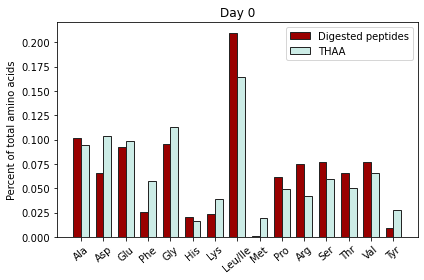

In [7]:
# Make bar plots of THAA peptides vs digested peptide AA compositions 

labels = ['Ala', 'Asp', 'Glu', 'Phe', 'Gly', 'His', 'Lys', 'Leu/Ile', 'Met', 'Pro', \
         'Arg', 'Ser', 'Thr', 'Val', 'Tyr']

T0_digested_peptide = digRelNAAF.iloc[0, 1:]
T0_THAA = sum_relAA.iloc[0, 1:]

T2_digested_peptide = digRelNAAF.iloc[1, 1:]
T2_THAA = sum_relAA.iloc[1, 1:]

T5_digested_peptide = digRelNAAF.iloc[2, 1:]
T5_THAA = sum_relAA.iloc[2, 1:]

T12_digested_peptide = digRelNAAF.iloc[3, 1:]
T12_THAA = sum_relAA.iloc[3, 1:]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, T0_digested_peptide, width, label='Digested peptides', color = '#990000', edgecolor = '#252525')
rects2 = ax.bar(x + width/2, T0_THAA, width, label='THAA', color = '#ccece6', edgecolor = '#252525')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Percent of total amino acids')
ax.set_title('Day 0')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 40)
ax.legend()

fig.tight_layout()

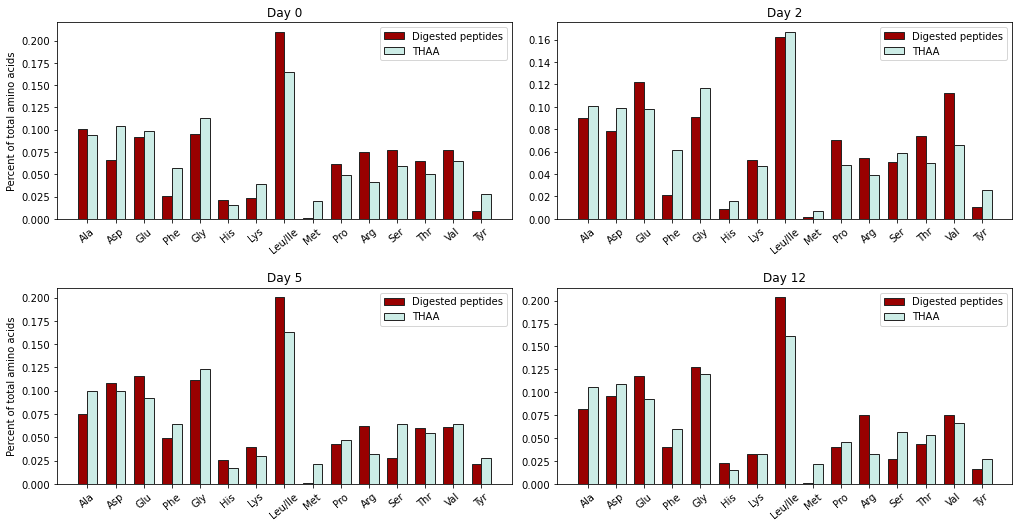

In [8]:
# Make bar plots of THAA peptides vs digested peptide AA compositions for all timepoints

labels = ['Ala', 'Asp', 'Glu', 'Phe', 'Gly', 'His', 'Lys', 'Leu/Ile', 'Met', 'Pro', \
         'Arg', 'Ser', 'Thr', 'Val', 'Tyr']

T0_digested_peptide = digRelNAAF.iloc[0, 1:]
T0_THAA = sum_relAA.iloc[0, 1:]

T2_digested_peptide = digRelNAAF.iloc[1, 1:]
T2_THAA = sum_relAA.iloc[1, 1:]

T5_digested_peptide = digRelNAAF.iloc[2, 1:]
T5_THAA = sum_relAA.iloc[2, 1:]

T12_digested_peptide = digRelNAAF.iloc[3, 1:]
T12_THAA = sum_relAA.iloc[3, 1:]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, axes = plt.subplots(figsize=(14, 7),nrows=2, ncols=2)
plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace= 0.10, hspace= 0.35)

# PLOT T0

axes[0,0].bar(x - width/2, T0_digested_peptide, width, label='Digested peptides', color = '#990000', edgecolor = '#252525')
axes[0,0].bar(x + width/2, T0_THAA, width, label='THAA', color = '#ccece6', edgecolor = '#252525')

# Add some text for labels, title and custom x-axis tick labels, etc.

axes[0,0].set_ylabel('Percent of total amino acids')
axes[0,0].set_title('Day 0')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(labels, rotation = 40)
axes[0,0].legend()

# PLOT T2

axes[0,1].bar(x - width/2, T2_digested_peptide, width, label='Digested peptides', color = '#990000', edgecolor = '#252525')
axes[0,1].bar(x + width/2, T2_THAA, width, label='THAA', color = '#ccece6', edgecolor = '#252525')

# Add some text for labels, title and custom x-axis tick labels, etc.

#axes[0,1].set_ylabel('Percent of total amino acids')
axes[0,1].set_title('Day 2')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(labels, rotation = 40)
axes[0,1].legend()

# PLOT T5

axes[1,0].bar(x - width/2, T5_digested_peptide, width, label='Digested peptides', color = '#990000', edgecolor = '#252525')
axes[1,0].bar(x + width/2, T5_THAA, width, label='THAA', color = '#ccece6', edgecolor = '#252525')

# Add some text for labels, title and custom x-axis tick labels, etc.

axes[1,0].set_ylabel('Percent of total amino acids')
axes[1,0].set_title('Day 5')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(labels, rotation = 40)
axes[1,0].legend()

# PLOT T12

axes[1,1].bar(x - width/2, T12_digested_peptide, width, label='Digested peptides', color = '#990000', edgecolor = '#252525')
axes[1,1].bar(x + width/2, T12_THAA, width, label='THAA', color = '#ccece6', edgecolor = '#252525')

# Add some text for labels, title and custom x-axis tick labels, etc.

#axes[0,1].set_ylabel('Percent of total amino acids')
axes[1,1].set_title('Day 12')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(labels, rotation = 40)
axes[1,1].legend()

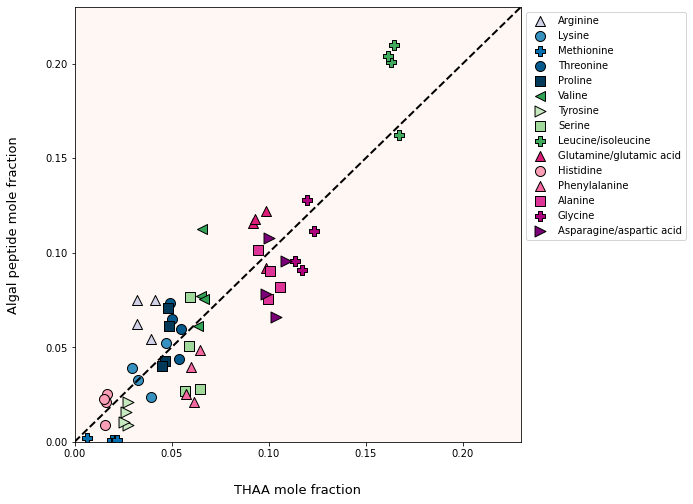

In [15]:
# Make scatter plots of THAA vs peptide AA compositions
# If they agree, they'll fall on a 1:1 slope

import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

Ala_x = sum_relAA.iloc[0:, 1]
Ala_y = digRelNAAF.iloc[0:, 1]

Asp_x = sum_relAA.iloc[0:, 2]
Asp_y = digRelNAAF.iloc[0:, 2]

Glu_x = sum_relAA.iloc[0:, 3]
Glu_y = digRelNAAF.iloc[0:, 3]

Phe_x = sum_relAA.iloc[0:, 4]
Phe_y = digRelNAAF.iloc[0:, 4]

Gly_x = sum_relAA.iloc[0:, 5]
Gly_y = digRelNAAF.iloc[0:, 5]

His_x = sum_relAA.iloc[0:, 6]
His_y = digRelNAAF.iloc[0:, 6]

Lys_x = sum_relAA.iloc[0:, 7]
Lys_y = digRelNAAF.iloc[0:, 7]

Leu_x = sum_relAA.iloc[0:, 8]
Leu_y = digRelNAAF.iloc[0:, 8]

Met_x = sum_relAA.iloc[0:, 9]
Met_y = digRelNAAF.iloc[0:, 9]

Pro_x = sum_relAA.iloc[0:, 10]
Pro_y = digRelNAAF.iloc[0:, 10]

Arg_x = sum_relAA.iloc[0:, 11]
Arg_y = digRelNAAF.iloc[0:, 11]

Ser_x = sum_relAA.iloc[0:, 12]
Ser_y = digRelNAAF.iloc[0:, 12]

Thr_x = sum_relAA.iloc[0:, 13]
Thr_y = digRelNAAF.iloc[0:, 13]

Val_x = sum_relAA.iloc[0:, 14]
Val_y = digRelNAAF.iloc[0:, 14]

Tyr_x = sum_relAA.iloc[0:, 15]
Tyr_y = digRelNAAF.iloc[0:, 15]

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)

#line = mlines.Line2D([0, 2], [0, 3.29], color='grey')
#transform = ax.transAxes
#line.set_transform(transform)
#ax1.add_line(line)

ax1.plot([0, 0.5], [0, 0.5],color='black',
         linestyle='dashed',linewidth=2)

# Above 1:1 line: BLUES

# Arginine
ax1.scatter(Arg_x, Arg_y, s=100, c='#d0d1e6', marker="^", label='Arginine', edgecolors='black')

# Lysine
ax1.scatter(Lys_x, Lys_y, s=100, c='#3690c0', marker="o", label='Lysine', edgecolors='black')

# Methinoine
ax1.scatter(Met_x, Met_y, s=100, c='#0570b0', marker="P", label='Methionine', edgecolors='black')

# Threonine
ax1.scatter(Thr_x, Thr_y, s=100, c='#045a8d', marker="o", label='Threonine', edgecolors='black')

# Proline
ax1.scatter(Pro_x, Pro_y, s=100, c='#023858', marker="s", label='Proline', edgecolors='black')

# Across 1:1 line: GREENS

# Valine
ax1.scatter(Val_x, Val_y, s=100, c='#31a354', marker="<", label='Valine', edgecolors='black')

# Tyrosine
ax1.scatter(Tyr_x, Tyr_y, s=120, c='#c7e9c0', marker=">", label='Tyrosine', edgecolors='black')

# Serine
ax1.scatter(Ser_x, Ser_y, s=100, c='#a1d99b', marker="s", label='Serine', edgecolors='black')

# Leucine/isoleucine
ax1.scatter(Leu_x, Leu_y, s=100, c='#41ab5d', marker="P", label='Leucine/isoleucine', edgecolors='black')

# Below 1:1 line: REDS

# Glutamine
ax1.scatter(Glu_x, Glu_y, s=100, c='#dd1c77', marker="^", label='Glutamine/glutamic acid', edgecolors='black')

# Histidine
ax1.scatter(His_x, His_y, s=100, c='#fa9fb5', marker="o", label='Histidine', edgecolors='black')

# Phenylalanine
ax1.scatter(Phe_x, Phe_y, s=100, c='#f768a1', marker="^", label='Phenylalanine', edgecolors='black')

# Alanine
ax1.scatter(Ala_x, Ala_y, s=100, c='#dd3497', marker="s", label='Alanine', edgecolors='black')

# Glycine
ax1.scatter(Gly_x, Gly_y, s=100, c='#ae017e', marker="P", label='Glycine', edgecolors='black')

# Asparagine
ax1.scatter(Asp_x, Asp_y, s=120, c='#7a0177', marker=">", label='Asparagine/aspartic acid', edgecolors='black')

ax1.set_ylim(0,.23)
ax1.set_xlim(0,.23)

ax1.set_ylabel('Algal peptide mole fraction', labelpad = 25, fontsize = 13)
ax1.set_xlabel('THAA mole fraction', labelpad = 25, fontsize = 13)
ax1.set_facecolor("#fff7f3")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.savefig('/home/millieginty/Documents/git-repos/rot-mayer/figures/manuscript-files/FIG5-Duffy.jpg', bbox_inches='tight', dpi=400)

## Comparison to peptide AA composition - ND

### Reading in the csv of naturally digested peptide relative AAs as a dataframe, then compare to THAA relative AAs

In [11]:
# Read in the peptide NAAF-corrected relative AAs of NATURALLY DIGESTED ("undigested") peptides
# There's a special version relative to only AAs compatible with THAA analysis, make sure to choose that one

undigRelNAAF_all = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/undigested-DB-RelNAAF-AAs-THAAcompatible.csv")

# Get rid of residues that weren't measured in THAA analyses: C, N, Q, W

undigRelNAAF = undigRelNAAF_all[['sample', 'A_RelNAAF', 'D_RelNAAF', 'E_RelNAAF', 'F_RelNAAF', \
                             'G_RelNAAF', 'H_RelNAAF', \
                             'K_RelNAAF', 'I/L_RelNAAF', 'M_RelNAAF', \
                             'P_RelNAAF', 'R_RelNAAF', \
                             'S_RelNAAF', 'T_RelNAAF', 'V_RelNAAF', 'Y_RelNAAF']].copy()

# Rename the columns without NAAF so we can compare to the THAA

undigRelNAAF.columns = ['sample', 'A_Rel', 'D_Rel', 'E_Rel', 'F_Rel', \
                             'G_Rel', 'H_Rel', \
                             'K_Rel', 'I/L_Rel', 'M_Rel', \
                             'P_Rel', 'R_Rel', \
                             'S_Rel', 'T_Rel', 'V_Rel', 'Y_Rel']

undigRelNAAF.head()

,sample,A_Rel,D_Rel,E_Rel,F_Rel,G_Rel,H_Rel,K_Rel,I/L_Rel,M_Rel,P_Rel,R_Rel,S_Rel,T_Rel,V_Rel,Y_Rel
0,T0,0.065521,0.131054,0.079808,0.032606,0.168612,0.040738,0.026560,0.157375,0.001437,0.103355,0.031251,0.028605,0.045302,0.070607,0.017168
1,T2,0.067817,0.094544,0.145750,0.040040,0.107535,0.020208,0.055142,0.163901,0.013033,0.081707,0.036110,0.035148,0.052990,0.077377,0.008699
2,T5,0.037689,0.184828,0.072995,0.031662,0.121737,0.047690,0.027112,0.189924,0.004327,0.117907,0.022497,0.020813,0.030626,0.046926,0.043267
3,T12,0.015074,0.142236,0.031210,0.006780,0.160093,0.083187,0.009512,0.265723,0.015911,0.150960,0.005173,0.004610,0.002946,0.039135,0.067450


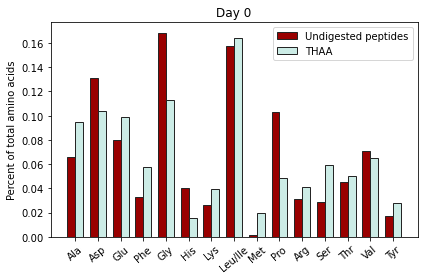

In [12]:
# Make bar plots of THAA peptides vs undigested peptide AA compositions 

labels = ['Ala', 'Asp', 'Glu', 'Phe', 'Gly', 'His', 'Lys', 'Leu/Ile', 'Met', 'Pro', \
         'Arg', 'Ser', 'Thr', 'Val', 'Tyr']

T0_undigested_peptide = undigRelNAAF.iloc[0, 1:]
T0_THAA = sum_relAA.iloc[0, 1:]

T2_undigested_peptide = undigRelNAAF.iloc[1, 1:]
T2_THAA = sum_relAA.iloc[1, 1:]

T5_undigested_peptide = undigRelNAAF.iloc[2, 1:]
T5_THAA = sum_relAA.iloc[2, 1:]

T12_undigested_peptide = undigRelNAAF.iloc[3, 1:]
T12_THAA = sum_relAA.iloc[3, 1:]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, T0_undigested_peptide, width, label='Undigested peptides', color = '#990000', edgecolor = '#252525')
rects2 = ax.bar(x + width/2, T0_THAA, width, label='THAA', color = '#ccece6', edgecolor = '#252525')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Percent of total amino acids')
ax.set_title('Day 0')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 40)
ax.legend()

fig.tight_layout()

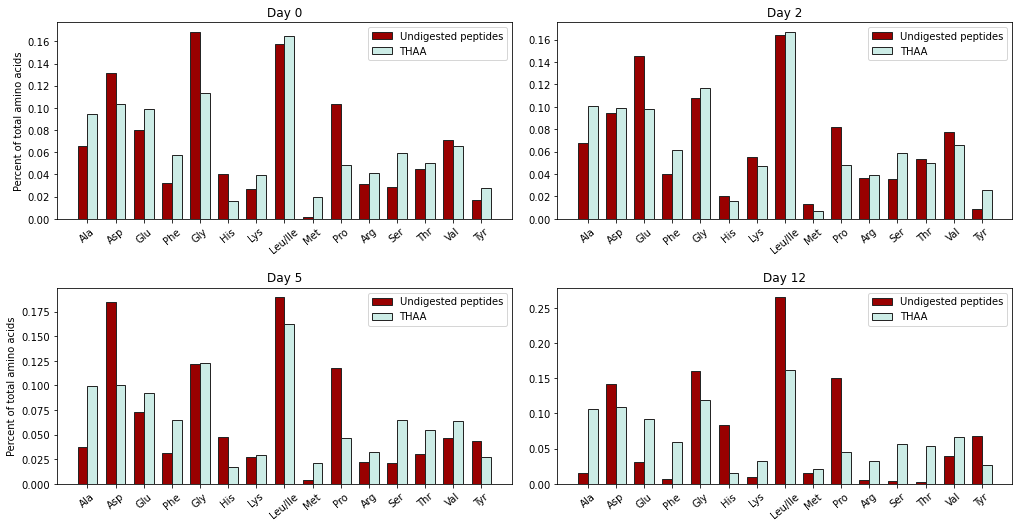

In [13]:
# Make bar plots of THAA peptides vs undigested peptide AA compositions for all timepoints

labels = ['Ala', 'Asp', 'Glu', 'Phe', 'Gly', 'His', 'Lys', 'Leu/Ile', 'Met', 'Pro', \
         'Arg', 'Ser', 'Thr', 'Val', 'Tyr']

T0_undigested_peptide = undigRelNAAF.iloc[0, 1:]
T0_THAA = sum_relAA.iloc[0, 1:]

T2_undigested_peptide = undigRelNAAF.iloc[1, 1:]
T2_THAA = sum_relAA.iloc[1, 1:]

T5_undigested_peptide = undigRelNAAF.iloc[2, 1:]
T5_THAA = sum_relAA.iloc[2, 1:]

T12_undigested_peptide = undigRelNAAF.iloc[3, 1:]
T12_THAA = sum_relAA.iloc[3, 1:]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, axes = plt.subplots(figsize=(14, 7),nrows=2, ncols=2)
plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace= 0.10, hspace= 0.35)

# PLOT T0

axes[0,0].bar(x - width/2, T0_undigested_peptide, width, label='Undigested peptides', color = '#990000', edgecolor = '#252525')
axes[0,0].bar(x + width/2, T0_THAA, width, label='THAA', color = '#ccece6', edgecolor = '#252525')

# Add some text for labels, title and custom x-axis tick labels, etc.

axes[0,0].set_ylabel('Percent of total amino acids')
axes[0,0].set_title('Day 0')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(labels, rotation = 40)
axes[0,0].legend()

# PLOT T2

axes[0,1].bar(x - width/2, T2_undigested_peptide, width, label='Undigested peptides', color = '#990000', edgecolor = '#252525')
axes[0,1].bar(x + width/2, T2_THAA, width, label='THAA', color = '#ccece6', edgecolor = '#252525')

# Add some text for labels, title and custom x-axis tick labels, etc.

#axes[0,1].set_ylabel('Percent of total amino acids')
axes[0,1].set_title('Day 2')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(labels, rotation = 40)
axes[0,1].legend()

# PLOT T5

axes[1,0].bar(x - width/2, T5_undigested_peptide, width, label='Undigested peptides', color = '#990000', edgecolor = '#252525')
axes[1,0].bar(x + width/2, T5_THAA, width, label='THAA', color = '#ccece6', edgecolor = '#252525')

# Add some text for labels, title and custom x-axis tick labels, etc.

axes[1,0].set_ylabel('Percent of total amino acids')
axes[1,0].set_title('Day 5')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(labels, rotation = 40)
axes[1,0].legend()

# PLOT T12

axes[1,1].bar(x - width/2, T12_undigested_peptide, width, label='Undigested peptides', color = '#990000', edgecolor = '#252525')
axes[1,1].bar(x + width/2, T12_THAA, width, label='THAA', color = '#ccece6', edgecolor = '#252525')

# Add some text for labels, title and custom x-axis tick labels, etc.

#axes[0,1].set_ylabel('Percent of total amino acids')
axes[1,1].set_title('Day 12')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(labels, rotation = 40)
axes[1,1].legend()

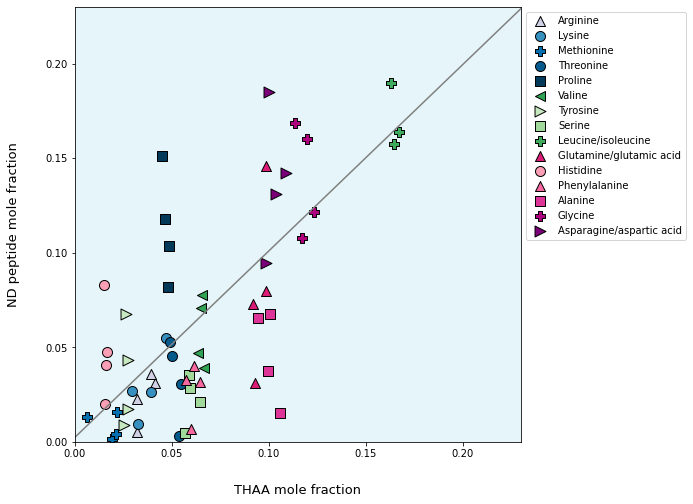

In [31]:
# Make scatter plots of THAA vs peptide AA compositions
# If they agree, they'll fall on a 1:1 slope

import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

Ala_x = sum_relAA.iloc[0:, 1]
Ala_y = undigRelNAAF.iloc[0:, 1]

Asp_x = sum_relAA.iloc[0:, 2]
Asp_y = undigRelNAAF.iloc[0:, 2]

Glu_x = sum_relAA.iloc[0:, 3]
Glu_y = undigRelNAAF.iloc[0:, 3]

Phe_x = sum_relAA.iloc[0:, 4]
Phe_y = undigRelNAAF.iloc[0:, 4]

Gly_x = sum_relAA.iloc[0:, 5]
Gly_y = undigRelNAAF.iloc[0:, 5]

His_x = sum_relAA.iloc[0:, 6]
His_y = undigRelNAAF.iloc[0:, 6]

Lys_x = sum_relAA.iloc[0:, 7]
Lys_y = undigRelNAAF.iloc[0:, 7]

Leu_x = sum_relAA.iloc[0:, 8]
Leu_y = undigRelNAAF.iloc[0:, 8]

Met_x = sum_relAA.iloc[0:, 9]
Met_y = undigRelNAAF.iloc[0:, 9]

Pro_x = sum_relAA.iloc[0:, 10]
Pro_y = undigRelNAAF.iloc[0:, 10]

Arg_x = sum_relAA.iloc[0:, 11]
Arg_y = undigRelNAAF.iloc[0:, 11]

Ser_x = sum_relAA.iloc[0:, 12]
Ser_y = undigRelNAAF.iloc[0:, 12]

Thr_x = sum_relAA.iloc[0:, 13]
Thr_y = undigRelNAAF.iloc[0:, 13]

Val_x = sum_relAA.iloc[0:, 14]
Val_y = undigRelNAAF.iloc[0:, 14]

Tyr_x = sum_relAA.iloc[0:, 15]
Tyr_y = undigRelNAAF.iloc[0:, 15]

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)

line = mlines.Line2D([0, 2], [0, 3.29], color='grey')
transform = ax.transAxes
line.set_transform(transform)
ax1.add_line(line)

# Above 1:1 line: BLUES

# Arginine
ax1.scatter(Arg_x, Arg_y, s=100, c='#d0d1e6', marker="^", label='Arginine', edgecolors='black')

# Lysine
ax1.scatter(Lys_x, Lys_y, s=100, c='#3690c0', marker="o", label='Lysine', edgecolors='black')

# Methinoine
ax1.scatter(Met_x, Met_y, s=100, c='#0570b0', marker="P", label='Methionine', edgecolors='black')

# Threonine
ax1.scatter(Thr_x, Thr_y, s=100, c='#045a8d', marker="o", label='Threonine', edgecolors='black')

# Proline
ax1.scatter(Pro_x, Pro_y, s=100, c='#023858', marker="s", label='Proline', edgecolors='black')

# Across 1:1 line: GREENS

# Valine
ax1.scatter(Val_x, Val_y, s=100, c='#31a354', marker="<", label='Valine', edgecolors='black')

# Tyrosine
ax1.scatter(Tyr_x, Tyr_y, s=120, c='#c7e9c0', marker=">", label='Tyrosine', edgecolors='black')

# Serine
ax1.scatter(Ser_x, Ser_y, s=100, c='#a1d99b', marker="s", label='Serine', edgecolors='black')

# Leucine/isoleucine
ax1.scatter(Leu_x, Leu_y, s=100, c='#41ab5d', marker="P", label='Leucine/isoleucine', edgecolors='black')

# Below 1:1 line: REDS

# Glutamine
ax1.scatter(Glu_x, Glu_y, s=100, c='#dd1c77', marker="^", label='Glutamine/glutamic acid', edgecolors='black')

# Histidine
ax1.scatter(His_x, His_y, s=100, c='#fa9fb5', marker="o", label='Histidine', edgecolors='black')

# Phenylalanine
ax1.scatter(Phe_x, Phe_y, s=100, c='#f768a1', marker="^", label='Phenylalanine', edgecolors='black')

# Alanine
ax1.scatter(Ala_x, Ala_y, s=100, c='#dd3497', marker="s", label='Alanine', edgecolors='black')

# Glycine
ax1.scatter(Gly_x, Gly_y, s=100, c='#ae017e', marker="P", label='Glycine', edgecolors='black')

# Asparagine
ax1.scatter(Asp_x, Asp_y, s=120, c='#7a0177', marker=">", label='Asparagine/aspartic acid', edgecolors='black')

ax1.set_ylim(0,.23)
ax1.set_xlim(0,.23)

ax1.set_ylabel('ND peptide mole fraction', labelpad = 25, fontsize = 13)
ax1.set_xlabel('THAA mole fraction', labelpad = 25, fontsize = 13)
ax1.set_facecolor("#e5f5f9")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [38]:
# Read in the peptide NAAF-corrected relative AAs of TRYPSIN DIGESTED ("digested") peptides
# These are not the THAA comparable files - they include C, N, Q, W

TD_DB_Relnaaf = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/digested-DB-RelNAAF-AAs.csv", index_col=0)

# Rename the columns without NAAF for simplicity

TD_DB_Relnaaf.columns = ['sample', 'A_Rel', 'C_Rel', 'D_Rel', 'E_Rel', 'F_Rel', \
                             'G_Rel', 'H_Rel', \
                             'K_Rel', 'I/L_Rel', 'M_Rel', 'N_Rel', \
                             'P_Rel', 'Q_Rel', 'R_Rel', \
                             'S_Rel', 'T_Rel', 'V_Rel', 'W_Rel', 'Y_Rel']

TD_DB_Relnaaf.head()

,sample,A_Rel,C_Rel,D_Rel,E_Rel,F_Rel,G_Rel,H_Rel,K_Rel,I/L_Rel,M_Rel,N_Rel,P_Rel,Q_Rel,R_Rel,S_Rel,T_Rel,V_Rel,W_Rel,Y_Rel
0,T0,0.089107,0.002788,0.057972,0.080951,0.022241,0.084168,0.018353,0.020688,0.184740,0.001028,0.093019,0.053811,0.019735,0.066220,0.067593,0.057357,0.067879,0.004359,0.007992
1,T2,0.080738,0.011424,0.069969,0.109305,0.018752,0.081349,0.007744,0.046543,0.145215,0.001682,0.052574,0.063187,0.037781,0.048449,0.045233,0.065684,0.100408,0.004518,0.009446
2,T5,0.067971,0.002384,0.097410,0.104342,0.043986,0.100703,0.022927,0.035280,0.181206,0.000799,0.064119,0.038551,0.025432,0.056384,0.025258,0.053849,0.055094,0.005304,0.019001
3,T12,0.071567,0.001981,0.083512,0.103062,0.034800,0.111750,0.019961,0.028783,0.178562,0.000630,0.092252,0.034864,0.024525,0.065806,0.023457,0.038256,0.065837,0.006672,0.013724


In [37]:
# Read in the peptide NAAF-corrected relative AAs of NATURALLY DIGESTED ("undigested") peptides
# These are not the THAA comparable files - they include C, N, Q, W

ND_DB_Relnaaf = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/undigested-DB-RelNAAF-AAs.csv", index_col=0)

# Rename the columns without NAAF for simplicity

ND_DB_Relnaaf.columns = ['sample', 'A_Rel', 'C_Rel', 'D_Rel', 'E_Rel', 'F_Rel', \
                             'G_Rel', 'H_Rel', \
                             'K_Rel', 'I/L_Rel', 'M_Rel', 'N_Rel', \
                             'P_Rel', 'Q_Rel', 'R_Rel', \
                             'S_Rel', 'T_Rel', 'V_Rel', 'W_Rel', 'Y_Rel']

ND_DB_Relnaaf.head()

,sample,A_Rel,C_Rel,D_Rel,E_Rel,F_Rel,G_Rel,H_Rel,K_Rel,I/L_Rel,M_Rel,N_Rel,P_Rel,Q_Rel,R_Rel,S_Rel,T_Rel,V_Rel,W_Rel,Y_Rel
0,T0,0.060436,0.000000,0.120883,0.073614,0.030075,0.155526,0.037576,0.024499,0.145161,0.001326,0.038763,0.095334,0.038210,0.028826,0.026385,0.041786,0.065127,0.000639,0.015836
1,T2,0.062243,0.000000,0.086773,0.133769,0.036749,0.098696,0.018547,0.050609,0.150428,0.011962,0.042504,0.074991,0.038481,0.033142,0.032259,0.048634,0.071017,0.001212,0.007984
2,T5,0.035957,0.000003,0.176334,0.069641,0.030207,0.116143,0.045498,0.025866,0.181196,0.004128,0.023063,0.112489,0.020203,0.021463,0.019856,0.029218,0.044769,0.002684,0.041279
3,T12,0.014624,0.000000,0.137992,0.030279,0.006578,0.155317,0.080706,0.009229,0.257796,0.015436,0.016571,0.146456,0.011417,0.005019,0.004473,0.002858,0.037967,0.001845,0.065437


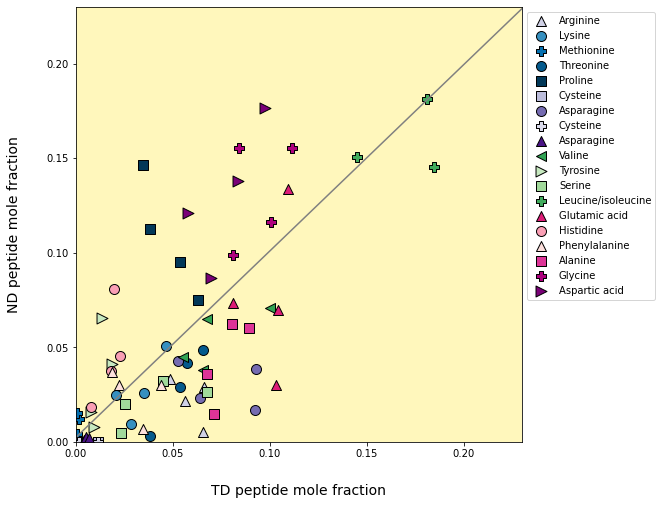

In [45]:
# Make scatter plots of trypsin digested vs naturally digested peptide AA compositions
# If they agree, they'll fall on a 1:1 slope

import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

Ala_x = TD_DB_Relnaaf.iloc[0:, 1]
Ala_y = ND_DB_Relnaaf.iloc[0:, 1]

Cys_x = TD_DB_Relnaaf.iloc[0:, 2]
Cys_y = ND_DB_Relnaaf.iloc[0:, 2]

Asp_x = TD_DB_Relnaaf.iloc[0:, 3]
Asp_y = ND_DB_Relnaaf.iloc[0:, 3]

Glu_x = TD_DB_Relnaaf.iloc[0:, 4]
Glu_y = ND_DB_Relnaaf.iloc[0:, 4]

Phe_x = TD_DB_Relnaaf.iloc[0:, 5]
Phe_y = ND_DB_Relnaaf.iloc[0:, 5]

Gly_x = TD_DB_Relnaaf.iloc[0:, 6]
Gly_y = ND_DB_Relnaaf.iloc[0:, 6]

His_x = TD_DB_Relnaaf.iloc[0:, 7]
His_y = ND_DB_Relnaaf.iloc[0:, 7]

Lys_x = TD_DB_Relnaaf.iloc[0:, 8]
Lys_y = ND_DB_Relnaaf.iloc[0:, 8]

Leu_x = TD_DB_Relnaaf.iloc[0:, 9]
Leu_y = ND_DB_Relnaaf.iloc[0:, 9]

Met_x = TD_DB_Relnaaf.iloc[0:, 10]
Met_y = ND_DB_Relnaaf.iloc[0:, 10]

Asn_x = TD_DB_Relnaaf.iloc[0:, 11]
Asn_y = ND_DB_Relnaaf.iloc[0:, 11]

Pro_x = TD_DB_Relnaaf.iloc[0:, 12]
Pro_y = ND_DB_Relnaaf.iloc[0:, 12]

Gln_x = TD_DB_Relnaaf.iloc[0:, 13]
Gln_y = ND_DB_Relnaaf.iloc[0:, 13]

Arg_x = TD_DB_Relnaaf.iloc[0:, 14]
Arg_y = ND_DB_Relnaaf.iloc[0:, 14]

Ser_x = TD_DB_Relnaaf.iloc[0:, 15]
Ser_y = ND_DB_Relnaaf.iloc[0:, 15]

Thr_x = TD_DB_Relnaaf.iloc[0:, 16]
Thr_y = ND_DB_Relnaaf.iloc[0:, 16]

Val_x = TD_DB_Relnaaf.iloc[0:, 17]
Val_y = ND_DB_Relnaaf.iloc[0:, 17]

Trp_x = TD_DB_Relnaaf.iloc[0:, 18]
Trp_y = ND_DB_Relnaaf.iloc[0:, 18]

Tyr_x = TD_DB_Relnaaf.iloc[0:, 19]
Tyr_y = ND_DB_Relnaaf.iloc[0:, 19]

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)

line = mlines.Line2D([0, 2], [0, 3.29], color='grey')
transform = ax.transAxes
line.set_transform(transform)
ax1.add_line(line)

# Above 1:1 line: BLUES

# Arginine
ax1.scatter(Arg_x, Arg_y, s=100, c='#d0d1e6', marker="^", label='Arginine', edgecolors='black')

# Lysine
ax1.scatter(Lys_x, Lys_y, s=100, c='#3690c0', marker="o", label='Lysine', edgecolors='black')

# Methinoine
ax1.scatter(Met_x, Met_y, s=100, c='#0570b0', marker="P", label='Methionine', edgecolors='black')

# Threonine
ax1.scatter(Thr_x, Thr_y, s=100, c='#045a8d', marker="o", label='Threonine', edgecolors='black')

# Proline
ax1.scatter(Pro_x, Pro_y, s=100, c='#023858', marker="s", label='Proline', edgecolors='black')

# New ones: PURPLES

# Cysteine
ax1.scatter(Cys_x, Cys_y, s=100, c='#bcbddc', marker="s", label='Cysteine', edgecolors='black')

# Asparagine
ax1.scatter(Asn_x, Asn_y, s=100, c='#756bb1', marker="o", label='Asparagine', edgecolors='black')

# Glutamine
ax1.scatter(Cys_x, Cys_y, s=100, c='#dadaeb', marker="P", label='Cysteine', edgecolors='black')

# Tryptophan
ax1.scatter(Trp_x, Trp_y, s=100, c='#4a1486', marker="^", label='Asparagine', edgecolors='black')

# Across 1:1 line: GREENS

# Valine
ax1.scatter(Val_x, Val_y, s=100, c='#31a354', marker="<", label='Valine', edgecolors='black')

# Tyrosine
ax1.scatter(Tyr_x, Tyr_y, s=120, c='#c7e9c0', marker=">", label='Tyrosine', edgecolors='black')

# Serine
ax1.scatter(Ser_x, Ser_y, s=100, c='#a1d99b', marker="s", label='Serine', edgecolors='black')

# Leucine/isoleucine
ax1.scatter(Leu_x, Leu_y, s=100, c='#41ab5d', marker="P", label='Leucine/isoleucine', edgecolors='black')

# Below 1:1 line: REDS

# Glutamic acid
ax1.scatter(Glu_x, Glu_y, s=100, c='#dd1c77', marker="^", label='Glutamic acid', edgecolors='black')

# Histidine
ax1.scatter(His_x, His_y, s=100, c='#fa9fb5', marker="o", label='Histidine', edgecolors='black')

# Phenylalanine
ax1.scatter(Phe_x, Phe_y, s=100, c='#fde0dd', marker="^", label='Phenylalanine', edgecolors='black')

# Alanine
ax1.scatter(Ala_x, Ala_y, s=100, c='#dd3497', marker="s", label='Alanine', edgecolors='black')

# Glycine
ax1.scatter(Gly_x, Gly_y, s=100, c='#ae017e', marker="P", label='Glycine', edgecolors='black')

# Aspartic acid
ax1.scatter(Asp_x, Asp_y, s=120, c='#7a0177', marker=">", label='Aspartic acid', edgecolors='black')

ax1.set_ylim(0,.23)
ax1.set_xlim(0,.23)

ax1.set_ylabel('ND peptide mole fraction', labelpad = 25, fontsize = 14)
ax1.set_xlabel('TD peptide mole fraction', labelpad = 25, fontsize = 14)
ax1.set_facecolor("#fff7bc")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()